<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-ML/blob/main/Day_27_One_hot_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day27-one-hot-encoding/cars.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [5]:
df.sample(5)

,brand,km_driven,fuel,owner,selling_price
998,Maruti,360003,Petrol,Second Owner,220000
6832,Hyundai,62000,Diesel,Second Owner,509999
4595,Maruti,30000,Petrol,First Owner,400000
1694,Hyundai,120000,Diesel,Second Owner,120000
2336,Tata,35000,Diesel,Second Owner,246000


In [9]:
df.shape

(8128, 5)

In [7]:
df.brand.unique(), df.brand.nunique()

(array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
        'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
        'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
        'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
        'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
       dtype=object), 32)

In [8]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [10]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

<Axes: >

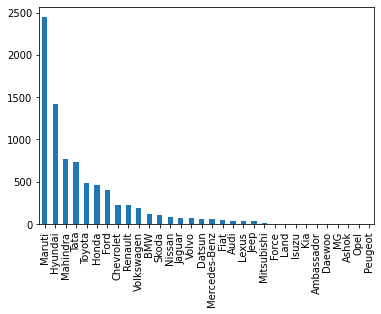

In [11]:
df.brand.value_counts().plot(kind = 'bar')

# **One hot encoding using Pandas**

In [12]:
pd.get_dummies(df,columns = ['fuel', 'owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,1,1,0,0,0,0
8124,Hyundai,119000,135000,0,1,0,0,0,1,0,0,0
8125,Maruti,120000,382000,0,1,0,0,1,0,0,0,0
8126,Tata,25000,290000,0,1,0,0,1,0,0,0,0


In it, we haven't dealt with the problem of multicollinearity. Wee need to solve it. To solve it we can use a paramter in `get_dummies` as `drop_first` and set it to `true`. This practice is also known as `K-1 encoding`

# K-1 Encoding

In [14]:
pd.get_dummies(df, columns = ['fuel','owner'], drop_first = True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


There are some problems in pandas and for that reason we use `onehotencoder` class of `scikit learn`

# **OneHotEncoder**

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:4],df['selling_price'], test_size = 0.2, random_state = 42)

x_train.shape, x_test.shape, y_train.shape

((6502, 4), (1626, 4), (6502,))

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
encoder = OneHotEncoder()

We can also avoid `multicollinearity` using the parameter `drop = 'first'` in OneHotEncoder class. We can also specify data type as needed by setting `dtype` parameter as `int32`

In [55]:
encoder = OneHotEncoder(drop = 'first',sparse_output = False, dtype = 'int32')

In [56]:
x_train_encoded = encoder.fit_transform(x_train[['fuel', 'owner']]) #.toarray() if sparse is false then we don't need to use it

In [57]:
x_train_encoded.shape

(6502, 7)

In [58]:
x_test_encoded = encoder.transform(x_test[['fuel', 'owner']])#.toarray()

In [60]:
np.hstack((x_train[['brand','km_driven']], x_train_encoded))

array([['Tata', 2560, 0, ..., 0, 0, 0],
       ['Honda', 80000, 0, ..., 1, 0, 0],
       ['Hyundai', 150000, 1, ..., 0, 0, 0],
       ...,
       ['Hyundai', 35000, 0, ..., 0, 0, 0],
       ['Maruti', 27000, 1, ..., 0, 0, 0],
       ['Maruti', 70000, 0, ..., 1, 0, 0]], dtype=object)

OneHotEncoding with high number of distinct variables in a column.

Here, we are doing it with brand column and taking threshold as 100.

In [62]:
counts = df.brand.value_counts()

In [65]:
threshold = 100

In [66]:
repl = counts[counts<= threshold].index

In [68]:
mf = pd.get_dummies(df['brand'].replace(repl, 'uncommon'))

In [71]:
mf.sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
5160,0,0,0,0,1,0,0,0,0,0,0,0,0
346,0,0,0,0,1,0,0,0,0,0,0,0,0
5077,0,0,0,0,0,0,0,0,0,0,0,0,1
5208,0,0,0,0,1,0,0,0,0,0,0,0,0
4953,0,0,0,0,0,0,0,0,0,0,1,0,0
